In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
gold_data= pd.read_csv("gold_price_data.csv")
print(gold_data)


           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [3]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [4]:
# Convert 'date_column' to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

#Correlation:
#1. Positive Corr
# 2. Negative corr
correlation = gold_data.corr()

<Axes: >

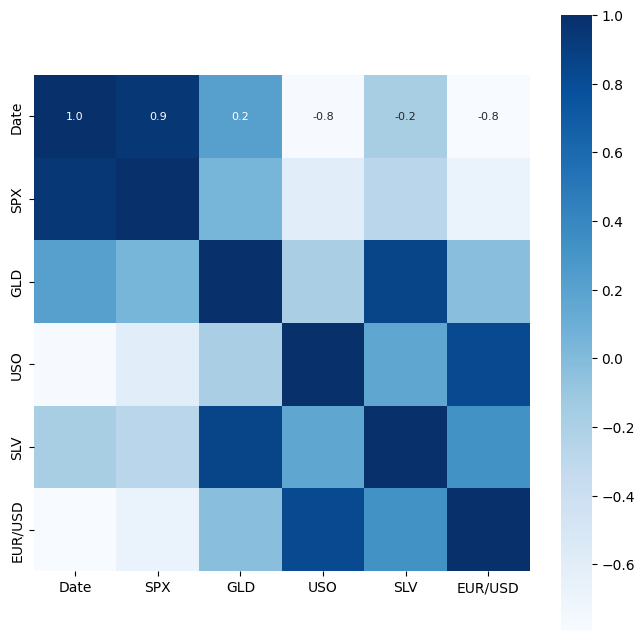

In [5]:

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar= True, square =True, fmt=".1f" ,annot = True, annot_kws ={'size':8}, cmap = "Blues")

In [6]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Srivardhan\AppData\Local\Temp\ipykernel_3872\2492781838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color = 'green')
c:\Users\Srivardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Srivardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

<Axes: xlabel='GLD', ylabel='Density'>

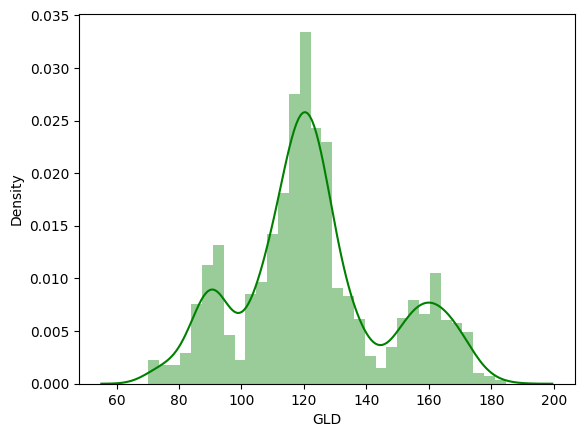

In [7]:
sns.distplot(gold_data['GLD'],color = 'green')

In [8]:
#SPLITTING the features and Target

X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [9]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [10]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [11]:
# splitting into training and test data

X_train, X_test , Y_train, Y_test  = train_test_split(X,Y, test_size = 0.2 , random_state = 2)

# the test_size  is 2 since we take 20 % for test and 80%  for the training data
# random_state = 2 Here, random_state=2 is set to 2, but you could choose any integer value.
#  The choice of 2 in this case is arbitrary. The important thing is that if you want to reproduce the
#  exact same split in the future, you would use the same random_state value.
#  It's common to use integers like 0, 1, 42, or any other number as long as it's
#  consistent across runs if reproducibility is desired.

In [12]:
regressor = RandomForestRegressor(n_estimators = 100 )
# n_estimators tell the no. of decision Trees

In [13]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

This above line of code fits (trains) the random forest regressor on the training data. X_train represents the input features, and Y_train represents the corresponding target values (labels or outcomes).

After this training step, the regressor object contains a trained random forest model that can be used to make predictions on new, unseen data.


In [14]:
# predicting on test data
test_data_prediction = regressor.predict(X_test)

In [15]:
print(test_data_prediction)

[168.50539878  81.56830008 116.13259976 127.58710093 120.6926013
 154.63039765 150.29949842 126.06340025 117.49369873 125.94620093
 116.79440102 172.10870098 141.57369773 167.96239894 115.2114004
 117.66260048 139.43350264 170.14530099 159.76830308 158.8232987
 155.19260002 125.47560022 175.79649892 157.37340304 125.15320041
  93.70269976  77.21830003 120.28259989 119.09209952 167.37160001
  88.19770107 125.12190016  90.96150067 117.7328001  121.09199887
 136.33820044 115.38600101 115.39090089 147.60170013 107.10770109
 104.07740246  87.14489786 126.58000052 117.80260038 153.17609893
 119.62530013 108.32459974 107.98529836  93.20810079 127.15729766
  74.62270054 113.61199925 121.38559992 111.26929883 118.82519908
 120.49739937 159.51000008 167.92920135 147.05439679  85.99729911
  94.24760018  86.72749855  90.46550025 118.95950073 126.39000064
 127.62339994 169.17360056 122.2433991  117.1676992   98.35810038
 168.56330127 142.98509814 132.21680296 121.18720232 120.26309968
 119.93520056

In [16]:
print(X_test)

              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090000  33.220001  1.327492
1693  1952.290039  14.930000  13.990000  1.129089
2054  2349.010010  11.060000  17.430000  1.064453
658   1273.849976  37.680000  28.420000  1.315686
376   1057.579956  35.959999  17.250000  1.478131

[458 rows x 4 columns]


In [17]:
# my_random_value = regressor.predict(1351.949951, 38.330002 , 32.900002 , 1.324854)
# print(my_random_value)


FIGURE HOW TO GET THE PREDICTION FOR OUR INPUT

In [18]:
# R SQUARED Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9898983860169598


.9 is small when the gold price is in 100 99.. etc... so this small deviation means the model is pretty acc


In [19]:
Y_test = list(Y_test)  # Y_test is converted to list to get a proper graph with out any probs

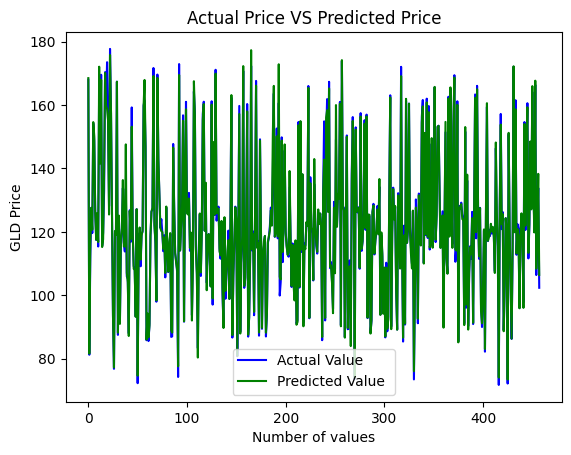

In [20]:
plt.plot(Y_test, color = "blue", label = "Actual Value")
plt.plot(test_data_prediction, color ='green' , label = 'Predicted Value ')
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [21]:

input_data = pd.Series({
  'SPX': 3100.0,
  'USO': 57.2,
  'SLV': 19.5,
  'EUR/USD': 1.12
})

input_df = pd.DataFrame(input_data).T

pred = regressor.predict(input_df)

# Convert prediction to float and format
pred_price = float(pred[0])
print(f"Predicted gold price: {pred_price:.3f}")

Predicted gold price: 127.741


SPX - The S&P 500 stock market index. Captures overall US stock market performance.

USO - The United States Oil Fund LP. Tracks oil prices and serves as an oil price indicator.

SLV - The iShares Silver Trust. Represents current silver prices traded on the market.

EUR/USD - The euro to US dollar exchange rate. Captures relative currency valuation.


In [22]:

def predict_gold_price(SPX, USO, SLV, EUR_USD):

    # Create input data
    input_data = pd.Series({
        'SPX': SPX,
        'USO': USO,
        'SLV': SLV,
        'EUR/USD': EUR_USD
    })

    # Convert input series to dataframe
    input_df = pd.DataFrame(input_data).T

    # Get prediction from model
    pred = regressor.predict(input_df)

    # Format prediction
    pred_price = float(pred[0])

    return pred_price

# Example usage
spx = 4927.93
uso = 71.86
slv = 21.21
eur_usd = 1.08

price = predict_gold_price(spx, uso, slv, eur_usd)
print(f"Predicted Gold Price: {price:.3f}")


Predicted Gold Price: 125.604
